In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [203]:
application_train=pd.read_csv('D:\\Study\\Cornell\\kaggle\\Default Credit Risk\\application_train.csv')

In [29]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Cleaning

In [30]:
missing_num=application_train.isnull().sum().sum()
missing_num

9152465

In [31]:
row_num=application_train.shape[0]
column_num=application_train.shape[1]
obs_num=row_num*column_num
missing_num=float(application_train.isnull().sum().sum())
print("There are {0} obs in the application_train dataset. Amoung them, {1}% are missing".format(obs_num,round(missing_num/obs_num,3)*100))

There are 37516342 obs in the application_train dataset. Amoung them, 24.4% are missing


# Exploratory Data Analysis

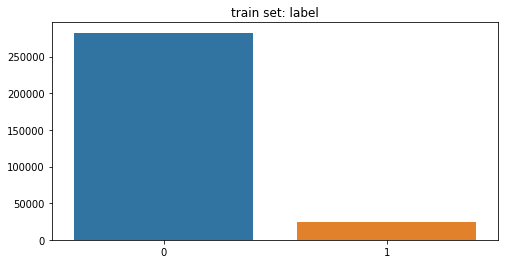

In [32]:
def plot_categorical(data, col, size=[12 ,7], xlabel_angle=0, title=''):
    plotdata = data[col].value_counts()
    plt.figure(figsize = size)
    sns.barplot(x = plotdata.index, y=plotdata.values)
    plt.title(title)
    if xlabel_angle!=0: 
        plt.xticks(rotation=xlabel_angle)
    plt.show()
plot_categorical(data=application_train, col='TARGET', size=[8 ,4], xlabel_angle=0, title='train set: label')

In [33]:
application_train.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

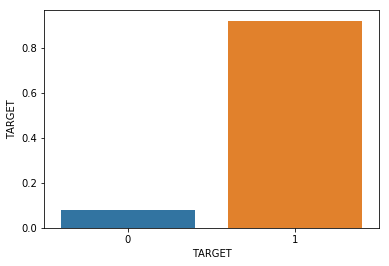

In [34]:
sns.barplot(application_train['TARGET'],application_train['TARGET'].value_counts(normalize=True))

In [35]:
pd.crosstab(application_train['TARGET'],application_train['NAME_CONTRACT_TYPE'],dropna=False,normalize='all')

NAME_CONTRACT_TYPE,Cash loans,Revolving loans
TARGET,,
0,0.829274,0.089997
1,0.075513,0.005216


In [36]:
pd.crosstab(application_train['TARGET'],application_train['CODE_GENDER'],dropna=False,normalize='all')

CODE_GENDER,F,M,XNA
TARGET,,,
0,0.612264,0.306994,0.000013
1,0.046080,0.034649,0.000000


In [37]:
print("There are {0} people with cars. Amoung them, {1}% repay the loan").format(application_train[application_train['FLAG_OWN_CAR']=='Y'].shape[0],np.round(application_train[application_train['FLAG_OWN_CAR']=='Y'].TARGET.value_counts(normalize=True).values[1],3)*100)

There are 104587 people with cars. Amoung them, 7.2% repay the loan


In [38]:
print("There are {0} people with realty. Amoung them, {1}% repay the loan").format(application_train[application_train['FLAG_OWN_REALTY']=='Y'].shape[0],np.round(application_train[application_train['FLAG_OWN_REALTY']=='Y'].TARGET.value_counts(normalize=True).values[1],3)*100)

There are 213312 people with realty. Amoung them, 8.0% repay the loan


(array([215371.,  61119.,  26749.,   3717.,    513.]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

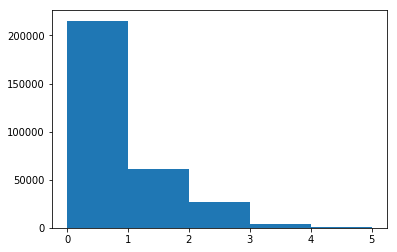

In [39]:
bin=[0,1,2,3,4,5]
plt.hist(application_train.CNT_CHILDREN,bins=bin)
# how to custom define bins

In [40]:
pd.crosstab(application_train['CNT_CHILDREN'],application_train['NAME_FAMILY_STATUS'],normalize='all')

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
CNT_CHILDREN,,,,,,
0,0.068118,0.411611,0.045956,0.126207,0.000007,0.048470
1,0.021424,0.142096,0.014273,0.018139,0.000000,0.002823
2,0.006296,0.073155,0.003613,0.003115,0.000000,0.000806
3,0.000852,0.010374,0.000397,0.000276,0.000000,0.000189
4,0.000107,0.001203,0.000039,0.000029,0.000000,0.000016
5,0.000016,0.000241,0.000007,0.000003,0.000000,0.000007
6,0.000007,0.000055,0.000003,0.000000,0.000000,0.000003
7,0.000003,0.000016,0.000000,0.000000,0.000000,0.000003
8,0.000000,0.000007,0.000000,0.000000,0.000000,0.000000


In [41]:
pd.crosstab(application_train['NAME_FAMILY_STATUS'],application_train['NAME_TYPE_SUITE'])

NAME_TYPE_SUITE,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied
NAME_FAMILY_STATUS,,,,,,,
Civil marriage,253,3702,29,147,171,1247,24112
Married,1940,28617,165,340,854,9685,154047
Separated,318,1747,20,70,132,74,17334
Single / not married,378,4150,44,268,486,345,39529
Widow,378,1933,13,41,127,19,13504


In [42]:
pd.crosstab(application_train['OCCUPATION_TYPE'],application_train['NAME_INCOME_TYPE'])

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Working
OCCUPATION_TYPE,,,,,,,
Accountants,0,3970,1,0,729,1,5112
Cleaning staff,0,892,0,2,261,0,3498
Cooking staff,0,1305,0,0,453,0,4188
Core staff,1,6528,2,0,6956,3,14080
Drivers,0,4916,0,0,815,1,12871
HR staff,0,220,0,0,64,0,279
High skill tech staff,0,3495,0,0,1033,0,6852
IT staff,0,204,0,0,55,0,267
Laborers,0,12763,1,1,1868,5,40548


In [49]:
INCOME_TYPE_TOTAL=pd.DataFrame()

In [126]:
INCOME_TYPE_TOTAL['INCOME']=application_train.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].mean()

In [131]:
INCOME_TYPE_TOTAL=INCOME_TYPE_TOTAL.sort_values('INCOME',ascending=False)

In [132]:
INCOME_TYPE_TOTAL['INCOME']

NAME_INCOME_TYPE
Businessman             652500.000000
Commercial associate    202955.327289
State servant           179737.969506
Student                 170500.000000
Working                 163169.889223
Maternity leave         140400.000000
Pensioner               136401.292273
Unemployed              110536.363636
Name: INCOME, dtype: float64

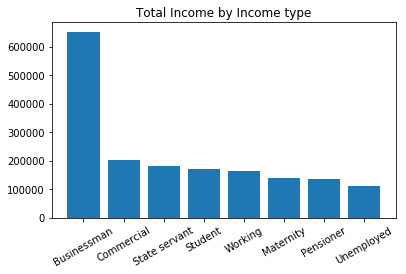

In [137]:
x=np.arange(8)
plt.bar(x,INCOME_TYPE_TOTAL['INCOME'].values)
plt.xticks(x,('Businessman','Commercial','State servant','Student','Working','Maternity','Pensioner','Unemployed'),rotation=30)
plt.tight_layout(pad=2,w_pad=6,h_pad=0.01)
plt.title('Total Income by Income type')
plt.show()

In [105]:
INCOME_TYPE_TARGET=pd.DataFrame()
INCOME_TYPE_TARGET['Percentage']=application_train.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts(normalize=True)
INCOME_TYPE_TARGET

Percentage
NAME_INCOME_TYPE     TARGET            
Businessman          0         1.000000
Commercial associate 0         0.925157
                     1         0.074843
Maternity leave      0         0.600000
                     1         0.400000
Pensioner            0         0.946136
                     1         0.053864
State servant        0         0.942450
                     1         0.057550
Student              0         1.000000
Unemployed           0         0.636364
                     1         0.363636
Working              0         0.904115
                     1         0.095885

In [156]:
MERGED=pd.merge(INCOME_TYPE_TARGET,INCOME_TYPE_TOTAL,on='NAME_INCOME_TYPE')
MERGED=MERGED[MERGED['Percentage']>0.5].sort_values('INCOME',ascending=False)
MERGED

,Percentage,INCOME
NAME_INCOME_TYPE,,
Businessman,1.000000,652500.000000
Commercial associate,0.925157,202955.327289
State servant,0.942450,179737.969506
Student,1.000000,170500.000000
Working,0.904115,163169.889223
Maternity leave,0.600000,140400.000000
Pensioner,0.946136,136401.292273
Unemployed,0.636364,110536.363636


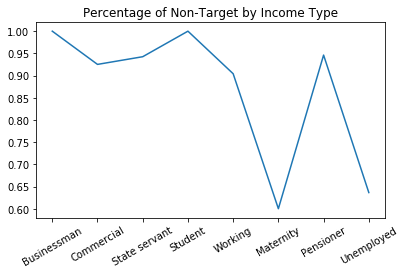

In [159]:
x=np.arange(8)
plt.plot(x,MERGED['Percentage'].values)
plt.xticks(x,('Businessman','Commercial','State servant','Student','Working','Maternity','Pensioner','Unemployed'),rotation=30)
plt.tight_layout(pad=2,w_pad=6,h_pad=0.01)
plt.title('Percentage of Non-Target by Income Type')
plt.show()

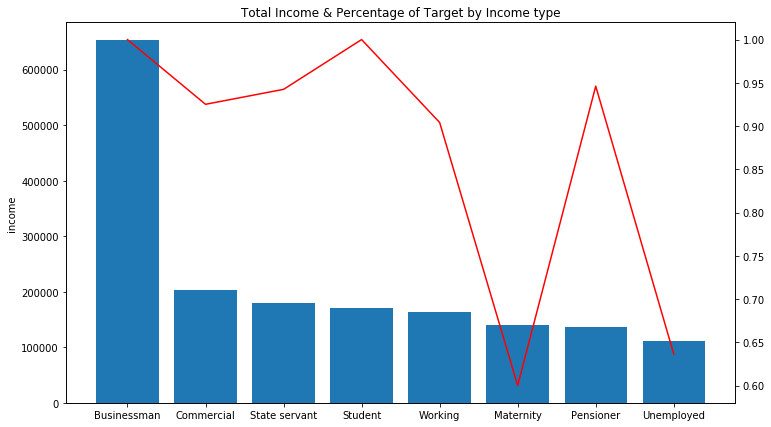

In [169]:
fig = plt.figure(1, figsize=(12,7))
ax = fig.add_subplot(111)
x=np.arange(8)
ax.bar(x, INCOME_TYPE_TOTAL['INCOME'].values)
ax.set_ylabel('income')
ax2 = ax.twinx()
ax2.plot(x,MERGED['Percentage'].values,color='red')
plt.xticks(x,('Businessman','Commercial','State servant','Student','Working','Maternity','Pensioner','Unemployed'),rotation=30)
plt.title('Total Income & Percentage of Target by Income type')
plt.show()

In [145]:
application_train['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [149]:
pd.crosstab(application_train['TARGET'],application_train['NAME_EDUCATION_TYPE'],normalize='all')

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
TARGET,,,,,
0,0.000524,0.230411,0.030584,0.011053,0.646699
1,0.000010,0.013037,0.002836,0.001356,0.063490


In [173]:
EDU_INCOME=pd.DataFrame()
EDU_INCOME['INCOME']=application_train.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].mean()
EDU_INCOME

,INCOME
NAME_EDUCATION_TYPE,
Academic degree,240009.146341
Higher education,208652.053814
Incomplete higher,181563.812397
Lower secondary,130079.358491
Secondary / secondary special,155158.512138


In [181]:
EDU_TARGET=pd.DataFrame()
EDU_TARGET['Percentage']=application_train.groupby('NAME_EDUCATION_TYPE')['TARGET'].value_counts(normalize=True)
EDU_TARGET=EDU_TARGET[EDU_TARGET['Percentage']>0.5]
EDU_TARGET

,,Percentage
NAME_EDUCATION_TYPE,TARGET,
Academic degree,0,0.981707
Higher education,0,0.946449
Incomplete higher,0,0.915150
Lower secondary,0,0.890723
Secondary / secondary special,0,0.910601


In [182]:
EDU_MERGED=pd.merge(EDU_INCOME,EDU_TARGET,on='NAME_EDUCATION_TYPE')
EDU_MERGED

,INCOME,Percentage
NAME_EDUCATION_TYPE,,
Academic degree,240009.146341,0.981707
Higher education,208652.053814,0.946449
Incomplete higher,181563.812397,0.915150
Lower secondary,130079.358491,0.890723
Secondary / secondary special,155158.512138,0.910601


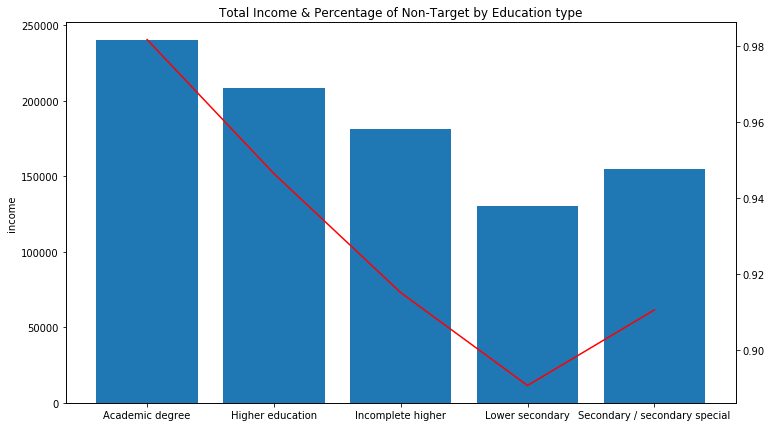

In [187]:
fig2 = plt.figure(1, figsize=(12,7))
ax3 = fig2.add_subplot(111)
x=np.arange(5)
ax3.bar(x, EDU_INCOME['INCOME'].values)
ax3.set_ylabel('income')
ax4 = ax3.twinx()
ax4.plot(x,EDU_MERGED['Percentage'].values,color='red')
plt.xticks(x,('Academic degree','Higher education','Incomplete higher','Lower secondary','Secondary / secondary special'),rotation=30)
plt.title('Total Income & Percentage of Non-Target by Education type')
plt.show()

D:\Annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Years of birth')

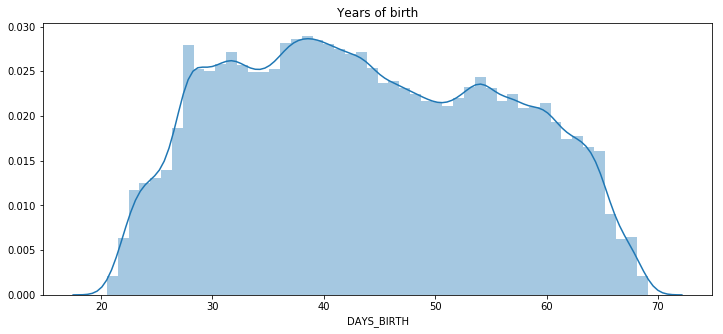

In [219]:
plt.figure(figsize=(12,5))
sns.distplot(0-application_train['DAYS_BIRTH']/365)
plt.title('Years of birth')

D:\Annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Years of Employment')

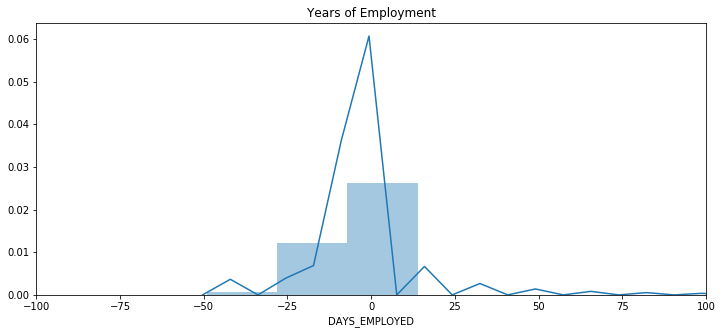

In [220]:
plt.figure(figsize=(12,5))
YEARS_EMPLOYED=sns.distplot(application_train['DAYS_EMPLOYED']/365)
YEARS_EMPLOYED.set(xlim=(-100,100))
plt.title('Years of Employment')
#Raw data has employment length over 1000 years, which is impossible. So I cut x axis to a limit of 100000days

D:\Annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Years of Changing ID')

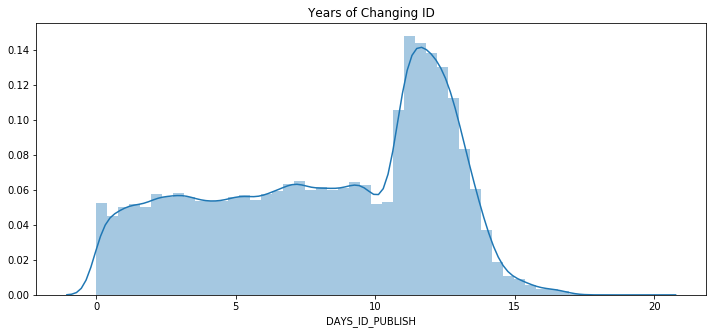

In [221]:
plt.figure(figsize=(12,5))
YEARS_ID_PUBLISH=sns.distplot(0-application_train['DAYS_ID_PUBLISH']/365)
plt.title('Years of Changing ID')

D:\Annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Months of Changing Registration')

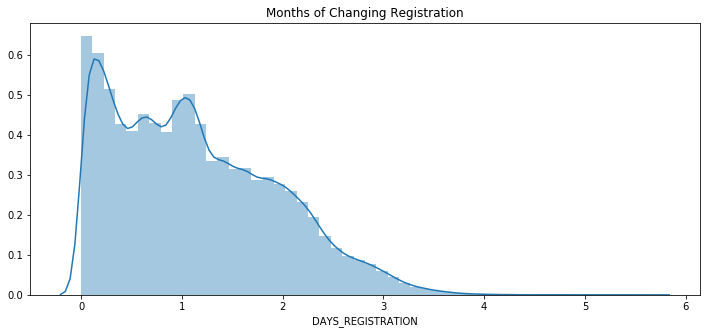

In [222]:
plt.figure(figsize=(12,5))
sns.distplot(0-application_train['DAYS_REGISTRATION']/4380)
plt.title('Months of Changing Registration')